In [1]:
from dbConn.mongo_conn import config

conn = config()
col = conn['travel_ai'].blog_contents

In [2]:
all_contents = list(col.find({'num_docs': {'$gte': 10, '$lte':100}}, {'cleaned_content': 1, 'custom_category': 1}))

In [3]:
conn.close()
len(all_contents)

183918

In [4]:
token_range = []
for cont in all_contents:
    for sent in cont['cleaned_content']:
        num_token = len(' '.join(sent).split())
        token_range.append(num_token)
len(token_range)

4951316

In [5]:
import numpy as np

print(f'Avg Number of token : {np.mean(token_range)}')
print(f'Min Number of token : {np.min(token_range)}')
print(f'Max Number of token : {np.max(token_range)}')

Avg Number of token : 39.48304794119382
Min Number of token : 1
Max Number of token : 7445


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of Sentences')

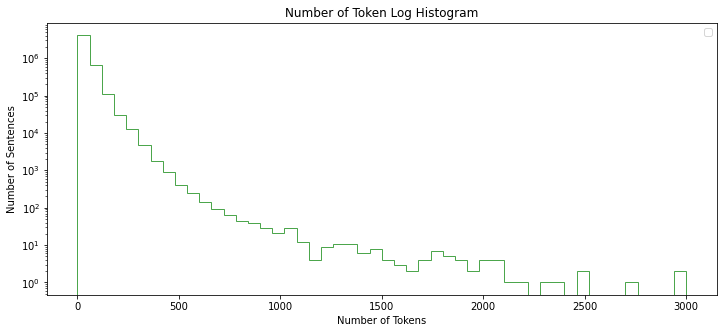

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(token_range, bins=50, range=[0,3000], color='g', alpha=0.7, histtype='step')
plt.legend()
plt.yscale('log')
plt.title('Number of Token Log Histogram')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')

In [6]:
all_category = []
for cont in all_contents:
    cate = cont['custom_category'][0]
    if cate not in all_category:
        all_category.append(cate)
print(len(all_category))
all_category

8


['명소', '카페', '공원', '음식', '술집', '숙박', '문화예술', '시장']

In [8]:
%%time
test_dataset = []
for cont in all_contents:
    for sent in cont['cleaned_content']:
        num_token = len(sent.split())
        if 10 < num_token < 500:
            label = cont['custom_category'][0]
            label_number = all_category.index(label)
            test_dataset.append((sent, label_number, label))
test_dataset = list(set(test_dataset))
len(test_dataset)

CPU times: user 3.91 s, sys: 75.8 ms, total: 3.98 s
Wall time: 3.98 s


1887567

In [9]:
import pandas as pd

df = pd.DataFrame(test_dataset, columns=['sentence', 'label', 'category'])
df.tail()

,sentence,label,category
1887562,"그리고 비루개 특징이 모닥불에서 마시멜로우, 쥐포, 고구마를 구울 수 있게 되어있는데요.",1,카페
1887563,그래서 수분 다 빠질 때까지 안 먹고 기다리기 이제 좀 맛난 볶음밥 같아졌죠?,3,음식
1887564,와온해변의 이쁜 야경을 볼 수 있고 또 여기서 일몰 기념 인증샷도 남기고 올거에요,5,숙박
1887565,제가 꿔바로우를 워낙 좋아해서여기서도 하나 시켜본건데요 꿔바로우의 생명인 쫄깃한 식...,3,음식
1887566,태국식 몽골리안 바베큐? 라이스 라스텔라가 제일 맛난줄알고 그동안 여길 잊고살았는데...,3,음식


In [10]:
df['category'].value_counts()

음식      1006949
카페       289712
명소       225305
숙박       116450
술집        97451
문화예술      72332
공원        50704
시장        28664
Name: category, dtype: int64

In [11]:
import pickle

with open('./test_dataset_each_10_500.pickle', 'wb') as f:
    pickle.dump(df, f)